In [1]:
import pandas as pd 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [3]:
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


In [4]:
df.shape

(5000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

In [6]:
df.describe()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,SleepTime,MedicalHistoryScore
count,5000.000000,4750.000000,4750.000000,4750.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,48.805600,27.332873,129.749053,199.611158,137.440600,146.573200,80.342000,0.510400,7.482200,4.485400
std,17.906991,7.190172,28.671508,58.173633,47.448072,82.623127,13.914919,0.499942,2.281562,2.852405
min,18.000000,15.000291,80.000000,100.000000,70.000000,15.000000,60.000000,0.000000,4.000000,0.000000
25%,34.000000,21.049709,105.000000,149.000000,103.000000,78.000000,70.000000,0.000000,5.000000,2.000000
50%,49.000000,27.218082,130.000000,201.000000,136.000000,144.000000,80.000000,1.000000,7.000000,4.000000
75%,64.000000,33.530189,155.000000,250.000000,167.000000,213.000000,89.000000,1.000000,9.000000,7.000000
max,79.000000,39.988943,179.000000,299.000000,582.000000,744.000000,198.000000,1.000000,11.000000,9.000000


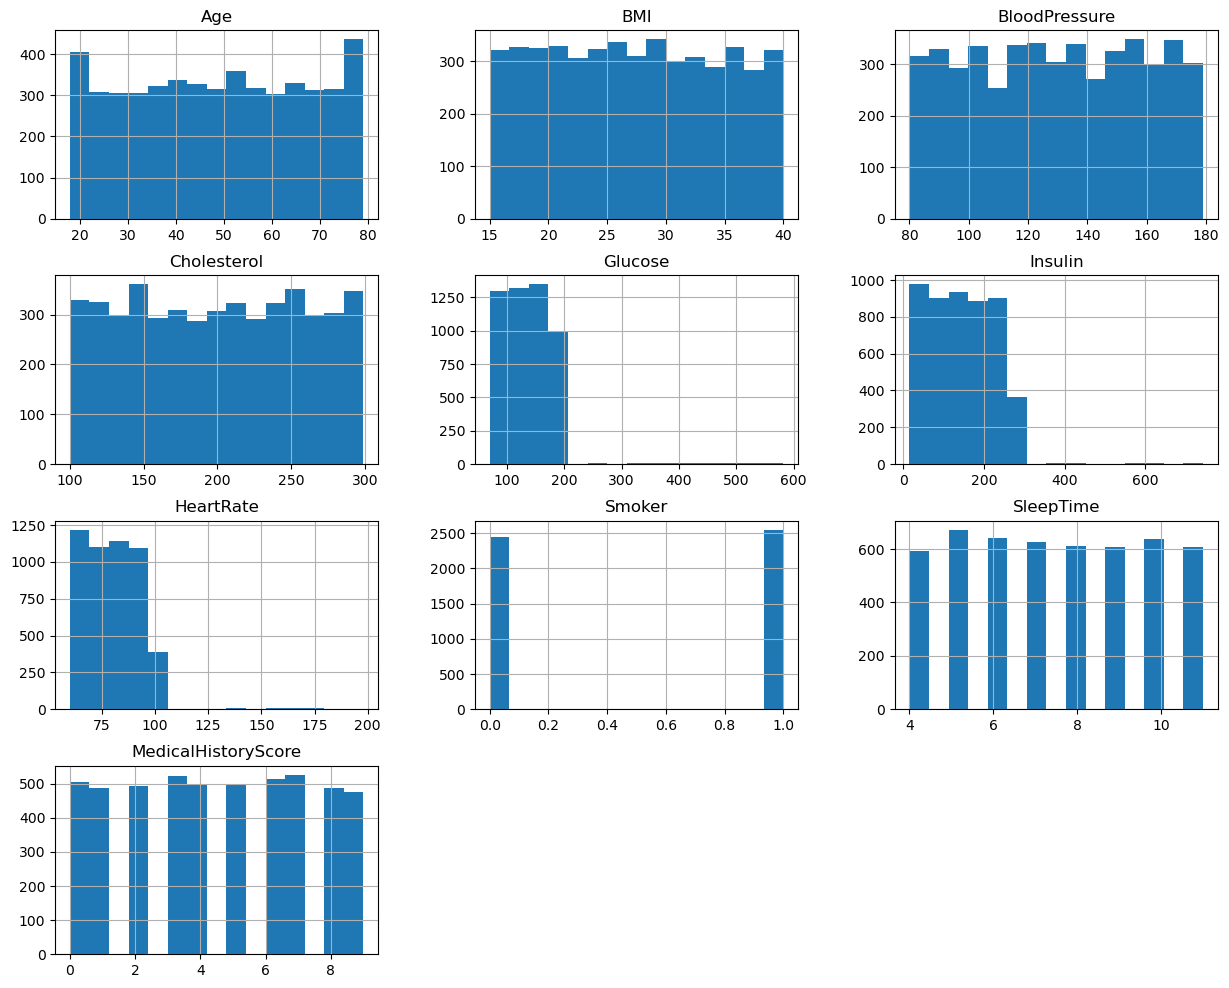

In [7]:
df.hist(figsize=(15,12),bins = 15)
plt.title("Distribution")
plt.show()

smoker, sleepTime and MEdical History score are discrete

In [8]:
df.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

estos son los porcentajes que falta de los 5000 registros

In [22]:
df.isnull().mean() * 100

Age                     0.00
BMI                     5.00
BloodPressure           5.00
Cholesterol             5.00
Glucose                 0.00
Insulin                 0.00
HeartRate               0.00
Smoker                  0.00
PhysicalActivity        0.00
SleepTime               0.00
MedicalHistoryScore     0.00
IncomeLevel             0.00
StressLevel             0.00
HealthIns               0.00
Disease                25.16
dtype: float64

eliminar filas si tienen todos sus datos vacios, comparamos con el shape de la data original y es la misma lo que quiere decir que no hay datos faltantes en toda una fila

In [9]:
drop=df.dropna(axis=0,how="all")
drop.shape

(5000, 15)

In [ ]:
usaremos la funcion missingno para entender la data faltante

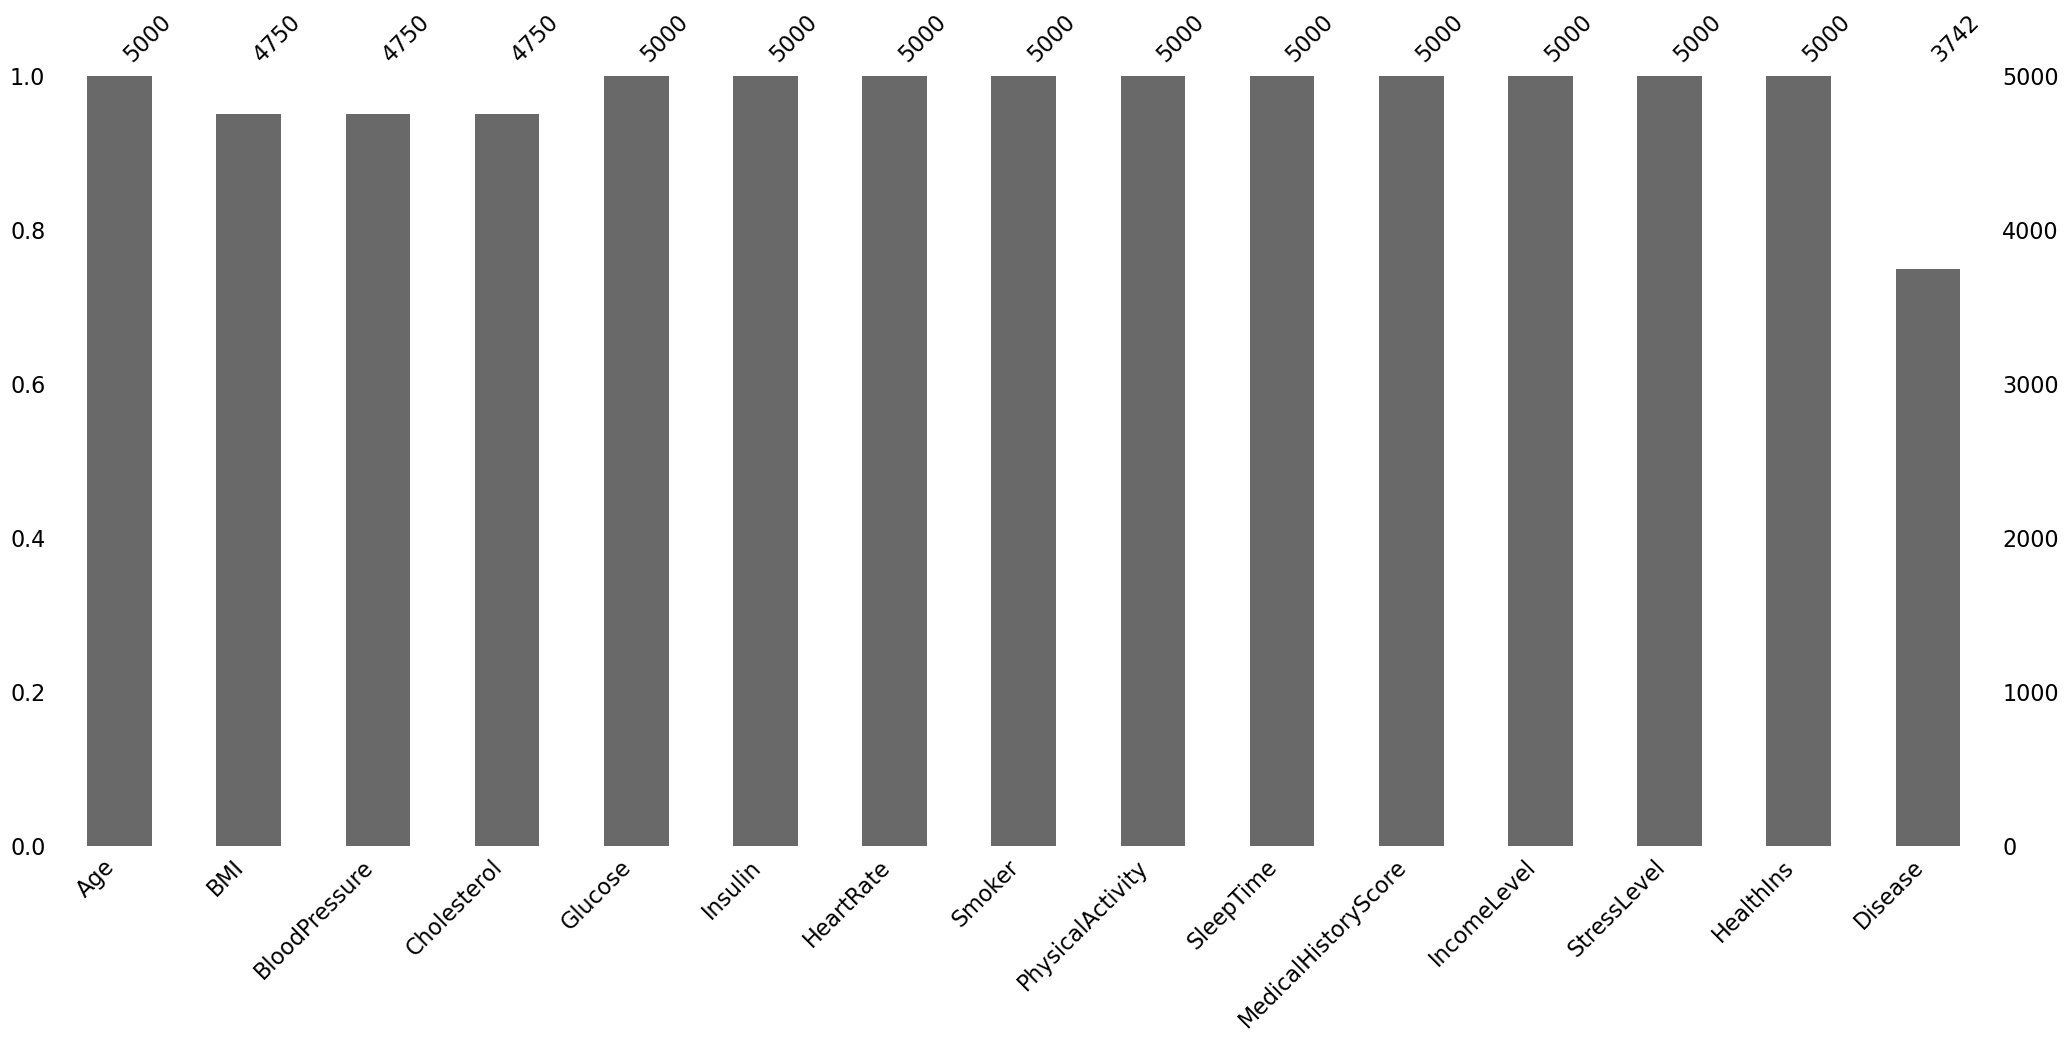

In [18]:
import missingno as msno
ax = msno.bar(df)

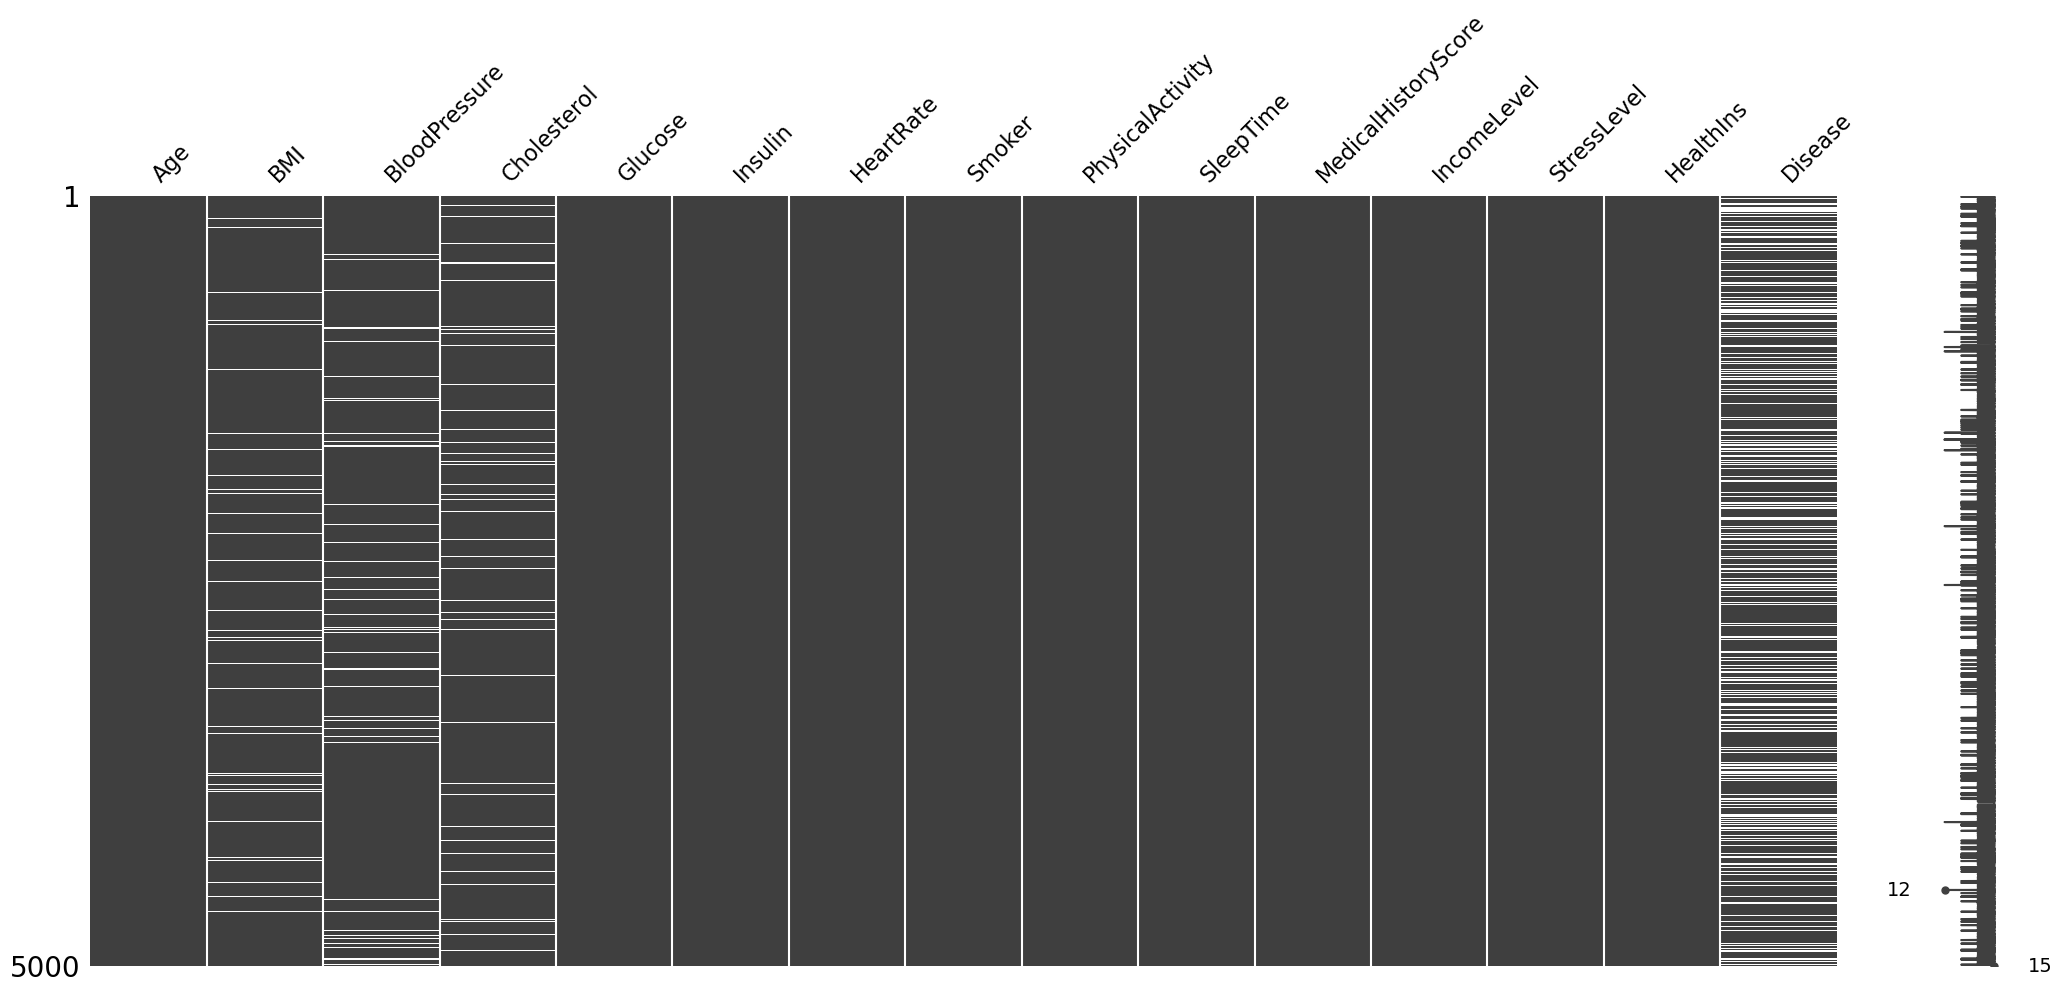

In [15]:
ax = msno.matrix(df)

In [ ]:
no hay ningun patron que se obeserve para determinar porque esta faltando data

BMI

<Axes: >

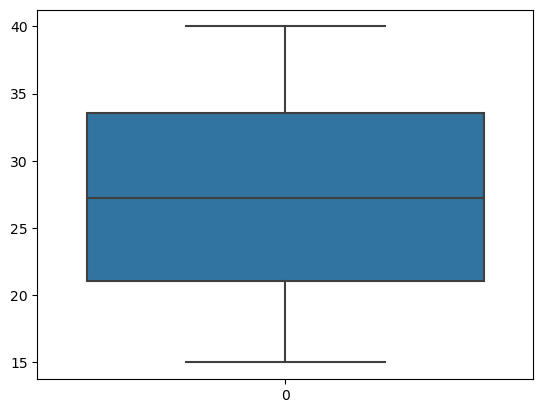

In [13]:
sns.boxplot(df["BMI"])

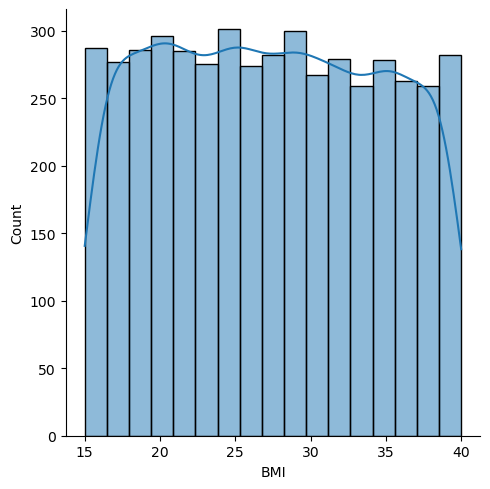

In [23]:
sns.displot(df["BMI"],kde=True)

In [41]:
mean = df["BMI"].mean()
median = df["BMI"].median()
mode = df["BMI"].mode()[0]
mean, median, mode

(27.3328732952, 27.21808199, 15.00029087)

In [28]:
BMI_mean=df["BMI"].fillna(mean)
BMI_median=df["BMI"].fillna(median)
BMI_mode=df["BMI"].fillna(mode)

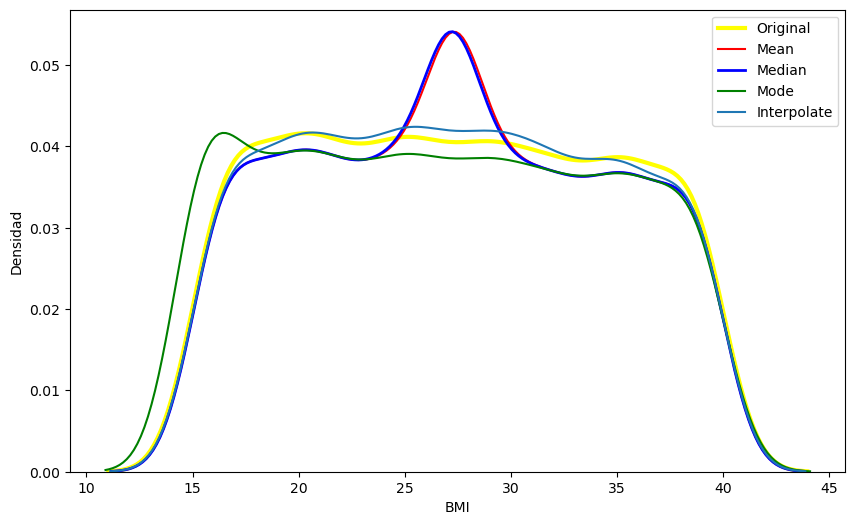

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x = df["BMI"], label="Original", color = "yellow",linewidth=3)
sns.kdeplot(x = BMI_mean, label="Mean",color = "red")
sns.kdeplot(x = BMI_median, label="Median", color = "blue",linewidth=2)
sns.kdeplot(x = BMI_mode, label="Mode", color = "green")
sns.kdeplot(x = inter, label="Interpolate")
plt.ylabel('Densidad')
plt.legend()
plt.show()

en la grafica se puede ver que con la moda es muy parecida, sin embargo la moda se aleja mucho a la mean, por lo tanto los datos se cargan mas hacia el lado izquierdo. 

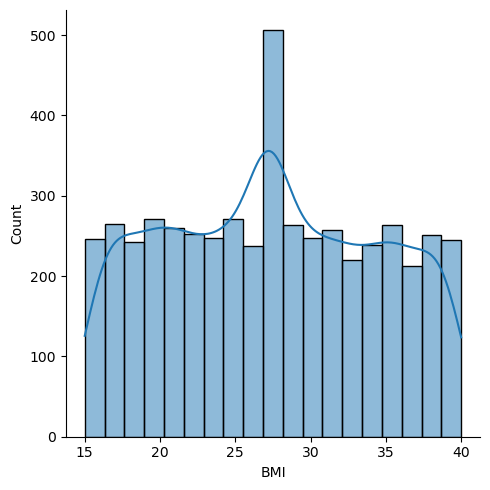

In [42]:
sns.displot(BMI_median,kde=True)

In [45]:
BMI_median.describe(), df["BMI"].describe()

(count    5000.000000
 mean       27.327134
 std         7.008121
 min        15.000291
 25%        21.398311
 50%        27.218082
 75%        33.181997
 max        39.988943
 Name: BMI, dtype: float64,
 count    4750.000000
 mean       27.332873
 std         7.190172
 min        15.000291
 25%        21.049709
 50%        27.218082
 75%        33.530189
 max        39.988943
 Name: BMI, dtype: float64)

revisamos las xxx estadisticas para observar si hay muchas diferencia pero ninguno tiene un cambio relevante

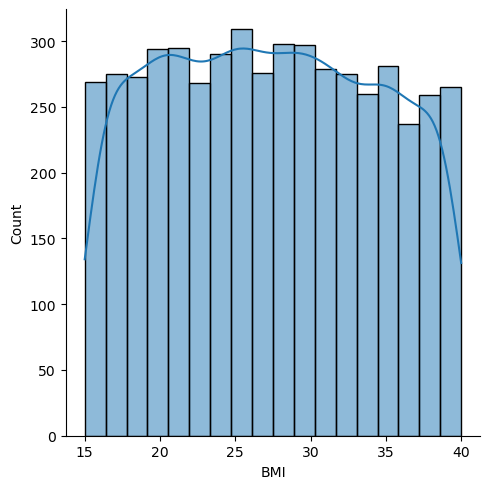

In [46]:
inter= df["BMI"].interpolate(method='linear', direction = 'forward')
sns.displot(inter,kde=True)

In [47]:
inter.describe()

count    5000.000000
mean       27.320139
std         7.098099
min        15.000291
25%        21.193732
50%        27.191454
75%        33.367192
max        39.988943
Name: BMI, dtype: float64

In [12]:
df["Disease"].unique()

array(['Disease_B', 'Disease_A', 'Disease_C', nan], dtype=object)

In [ ]:
plt.figure(figsize=(20,10)) 
c= df.corr() 
sns.heatmap(c,cmap=”BrBG”,annot=True) 
c 